<a href="https://colab.research.google.com/github/eunewoo/dlatk-for-nocoder/blob/main/Copy_of_Practice_of_DLATK2_2_Colab_Tutorial_for_Differential_Language_Analysis_(Getting_Started).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> DLATK - Colab Tutorial for Differential Language Analysis </h1>

This tutorial covers:

<img src="https://drive.google.com/uc?export=view&id=16SgSLj9KkmxUX8LEeFNsq0GRE4gqvQux" height="170"/>

# STEP1: Setup Colab


In [1]:
#@markdown Click the __Play button__ to the left to start the setup. Proceed to the next stage once you see:

#@markdown "DLATK setup completed successfully. Enjoy your analysis!"

from IPython.utils import io
import subprocess

def setup_dlatk():
    # Install DLATK with additional features
    subprocess.run("pip install dlatk[wordcloud,langid]", shell=True)

    # Initialize DLATK for Colab environment
    result = subprocess.run("dlatkInterface.py --colabify", shell=True, capture_output=True, text=True)

    # Optional: Adjust Colab output for a better experience
    try:
        from dlatk.tools.colab_methods import colab_shorten_and_bg
        colab_shorten_and_bg()  # This shortens output blocks and changes the output background color.
    except ImportError as e:
        print("Some optional setup steps failed:", e)

    return result.stdout + '\n' + result.stderr

# Suppressing the output of the main installation and setup commands
with io.capture_output() as captured:
    setup_output = setup_dlatk()

# Check the captured output for a specific success message
if 'DLATK exits with success! A good day indeed' in setup_output:
    print("DLATK setup completed successfully. Enjoy your analysis!")
else:
    print("DLATK setup may have encountered issues. Please check the logs for more details.")


DLATK setup completed successfully. Enjoy your analysis!


<a name="data"></a>
# STEP2: Upload text data & Select text column

DLATK uses data in CSV (comma-seprated value) format. Your csv needs at least two columns:
* **`message`**: contains the text to be analyzed.
* **`user_id`**: contains a user id for each message.

<br />

The CSV may also have other columns, including other ids you may wish to analyze your data by (e.g. `message_id`). For example,

|message_id|message|user_id|created_date|
|----------|-------|-------|------------|
|17557|urlLink Ananova - New rules on pizza to be introduced|1405024|2004-05-27|
|15996|I just read John Kerry's nomination acceptance speech. Christ, he can talk.  God bless America.|3523319|2004-07-29|
|27462| Talk about 'better late than never'...   urlLink  Couple Living Together 77 Years Marries   .   Thanks to  urlLink  Zorak  for the link.|942828|2003-04-04|

<br />
<br />



* `Upload from desktop` - your csv data that you want to analyze.
* `msgs404u.csv` - sample language data from 404 blog authors.
<!-- * `msgs100u.csv` - sample language data from 100 blog authors. -->

<br />

In [2]:
import re
from google.colab import files
import os
import csv

#@title Upload text data
#@markdown ### Select text Dataset or Upload from Desktop
#@markdown Choose a text dataset from the dropdown, or select "Upload from desktop" to upload your own file.

#@markdown After making your selection, click the __play button__ at the top left to proceed.

text_filename = "msgs404u.csv" #@param ["Upload from desktop", "msgs404u.csv"]

#@markdown If "Upload from desktop" is selected, then click the __"Choose Files"__ button at the bottom to upload your file.

def sanitize_file_name(file_name):
    base_file_name = re.sub(r" \(\d+\)", "", file_name)
    if not base_file_name.endswith('.csv'):
        base_file_name += '.csv'
    return base_file_name

def add_message_id_if_missing(file_path):
    headers_changed = False
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader, None)

        if headers and 'message_id' not in headers:
            headers_changed = True
            new_rows = [['message_id'] + headers]
            new_rows += [[str(i+1)] + row for i, row in enumerate(reader)]

    if headers_changed:
        with open(file_path, mode='w', encoding='utf-8', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(new_rows)
        print("Added 'message_id' column and saved changes.")
    else:
        print("'message_id' column already exists.")

    #return new_rows

if text_filename != "Upload from desktop":
    file_name = sanitize_file_name(text_filename)
    file_path = os.path.join("/content", file_name)
    print(f'Text file selected: {file_name}')
else:
    print("Please upload a file from the desktop.")
    uploaded_files = files.upload()
    if uploaded_files:
        file_name = next(iter(uploaded_files))
        file_name = sanitize_file_name(file_name)
        file_path = os.path.join("/content", file_name)
        headers = add_message_id_if_missing(file_path)
        add_message_id_if_missing(file_path)
        print(f'Uploaded file name: {file_name}')
    else:
        print("No file uploaded. Please upload a file to proceed.")

if os.path.exists(file_path):
    print(f'File ready for use: {file_path}')
else:
    print("File not found. Please ensure the file exists and try again.")


<IPython.core.display.Javascript object>

Text file selected: msgs404u.csv
File ready for use: /content/msgs404u.csv


In [3]:
#@title Select Text Column (unit of analysis)

#@markdown Click the __play button__ at the top left to view the dropdown menu.

#@markdown __Select__ the Text Column you wish to analyze, then click the "Run Command" button.

import csv
import ipywidgets as widgets
from IPython.display import display, clear_output

def get_available_columns(file_path):
    """Read the first row of the CSV file to get the column names."""
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader, None)
    return headers

available_columns = get_available_columns(file_path)

text_column_options = [col for col in available_columns if col != "user" and not col.endswith("_id")]
text_column_dropdown = widgets.Dropdown(options=text_column_options, description='Text Column:')
text_confirm_button = widgets.Button(description="Confirm Text Column")
output = widgets.Output()

def on_text_confirm_button_clicked(b):
    global text_column_name
    text_column_name = text_column_dropdown.value
    with output:
        clear_output()
        print(f'Text Column confirmed: {text_column_name}')
        # Now you should run the next code block to select the ID column

text_confirm_button.on_click(on_text_confirm_button_clicked)
display(text_column_dropdown, text_confirm_button, output)


<IPython.core.display.Javascript object>

Dropdown(description='Text Column:', options=('created_date', 'message'), value='created_date')

Button(description='Confirm Text Column', style=ButtonStyle())

Output()

In [4]:
#@title Select ID Column (unit of analysis)

#@markdown Click the __play button__ at the top left to view the dropdown menu.

#@markdown __Select__ the ID Column you wish to analyze, then click the "Confirm ID Column" button.

import csv
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming 'file_path' is defined and accessible
# Assuming 'text_column_name' is defined and accessible (selected from Code A)

def get_available_columns(file_path):
    """Read the first row of the CSV file to get the column names."""
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader, None)
    return headers

def add_id_column_if_missing(file_path, column_name):
    """Adds an ID column if it's missing, appending numbers from 1 upwards to the end of each row."""
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = list(csv.reader(file))
        headers = reader[0]
        column_id_name = column_name + '_id'
        if column_id_name not in headers:
            headers.append(column_id_name)  # Append the new ID column name to the headers
            for i, row in enumerate(reader[1:], start=1):  # Start from 1 to skip header row
                row.append(str(i))  # Append the new ID value at the end of each row
            with open(file_path, mode='w', encoding='utf-8', newline='') as wfile:
                writer = csv.writer(wfile)
                writer.writerow(headers)  # Write the updated headers
                writer.writerows(reader[1:])  # Write the updated data rows, excluding the original headers
            print(f"Added '{column_id_name}' column and saved changes.")
            return True
    return False

# Attempt to add an ID column if missing
add_id_column_if_missing(file_path, text_column_name)

# Refresh available columns to include potential new ID column
available_columns = get_available_columns(file_path)

# Include all columns ending with "_id" and the new ID column related to the selected text column
id_column_options = [col for col in available_columns if col.endswith("_id")]

id_column_dropdown = widgets.Dropdown(options=id_column_options, description='ID Column:', value=None)
id_confirm_button = widgets.Button(description="Confirm ID Column")
output = widgets.Output()

def on_id_confirm_button_clicked(b):
    global id_column_name
    id_column_name = id_column_dropdown.value
    with output:
        clear_output()
        print(f'ID Column confirmed: {id_column_name}')

id_confirm_button.on_click(on_id_confirm_button_clicked)
display(id_column_dropdown, id_confirm_button, output)


<IPython.core.display.Javascript object>

Dropdown(description='ID Column:', options=('message_id', 'user_id'), value=None)

Button(description='Confirm ID Column', style=ButtonStyle())

Output()

👉 For detailed information about the columns in the `msgs404u.csv` file, as well as their corresponding outcome files `users404.csv`, you can refer to [this link](https://github.com/dlatk/dlatk/blob/public/dlatk/data/colab_dataset.md). This link contains detailed descriptions of what each column in these datasets represents.

<a name="data"></a>
# STEP3: Select features to extract & Check tables

In [6]:
import subprocess
import ipywidgets as widgets
from IPython.display import display, clear_output

#@title Select features to extract
#@markdown Click the __play button__ at the top left to view the dropdown menu.

#@markdown __Select__ the features you wish to analyze, then click the "Run Command" button.

database_name = "colab_csv"
file_name_without_extension = file_name.rsplit('.', 1)[0]  # Assuming file_name is defined globally

# Dropdown for feature generation options
feature_options = widgets.Dropdown(
    options=['Select option', '1to2grams-filtered', '1to2grams-unfiltered',  'topics'],
    value='Select option',
    description='Options:',
)

# Text area for displaying output
output = widgets.Output()
run_button = widgets.Button(description="Run Command")
generated_feature_table_name = None  # This will hold the name of the last generated feature table for reuse

def generate_unfiltered_feature_table():
    global generated_feature_table_name
    combined_feature_table_name = "1to2gram"
    command = f"dlatkInterface.py -d {database_name} -t {file_name} -g {id_column_name} " \
              f"--message_field {text_column_name} --messageid_field {text_column_name}_id " \
              f"--add_ngrams -n 1 2 --combine_feat_tables {combined_feature_table_name}"

    print(f"Generating unfiltered 1to2grams feature table: {command}")
    print("It will take upto 3 minutes to execute it, please wait!")
    subprocess.run(command, shell=True)
    generated_feature_table_name = f"feat${combined_feature_table_name}${file_name_without_extension}${id_column_name}"
    print(f"Generated feature table: {generated_feature_table_name}")

def execute_feature_command(b):
    global generated_feature_table_name

    with output:
        clear_output()
        if feature_options.value == '1to2grams-unfiltered':
            generate_unfiltered_feature_table()

        elif feature_options.value == '1to2grams-filtered':
            # if not generated_feature_table_name:
            #     print("Unfiltered table not found, generating now...")
            #     generate_unfiltered_feature_table()
            combined_feature_table_name = "1to2gram"
            command = f"dlatkInterface.py -d {database_name} -t {file_name} -g {id_column_name} " \
                      f"--message_field {text_column_name} --messageid_field {text_column_name}_id " \
                      f"--add_ngrams -n 1 2 --combine_feat_tables {combined_feature_table_name} " \
                      f"--feat_occ_filter --set_p_occ 0.10 --feat_colloc_filter"

            print(f"Executing: {command}")
            print("It will take upto 3 minutes to execute it, please wait!")
            subprocess.run(command, shell=True)
            generated_feature_table_name = f"feat${combined_feature_table_name}${file_name_without_extension}${id_column_name}$0_1$pmi3_0"
            print(f"Generated feature table: {generated_feature_table_name}")

        elif feature_options.value == 'topics':
            n_topics = 20
            lex_table_name = f"feat$cat_fb2000_cp_w${file_name_without_extension}${id_column_name}$1gra"
            # command = f"dlatkInterface.py -d {database_name} -t {file_name} -g {group_id} " \
            #           f"--group_freq_thresh 100 --add_lex_table -l nrc_sent --weighted_lexicon"
            command = f"dlatkInterface.py -d {database_name} -t {file_name} -g {id_column_name} " \
                      f"--message_field {text_column_name} --messageid_field {text_column_name}_id " \
                      f"--group_freq_thresh 100 --add_lex_table -l fb2000_cp --weighted_lexicon"
            print(f"Executing: {command}")
            print("It will take upto 3 minutes to execute it, please wait!")
            subprocess.run(command, shell=True)
            print(f"Generated LDA feature table: {lex_table_name}")

run_button.on_click(execute_feature_command)
display(feature_options, run_button, output)


<IPython.core.display.Javascript object>

Dropdown(description='Options:', options=('Select option', '1to2grams-filtered', '1to2grams-unfiltered', 'topi…

Button(description='Run Command', style=ButtonStyle())

Output()

In [ ]:
!dlatkInterface.py -d colab_csv -t msgs404testchat2.csv -g user_id --message_field chat --add_ngrams -n 1 2 --combine_feat_tables 1to2gram

In [7]:
#@markdown Test code: Check which tables are formed so far

!dlatkInterface.py \
  -d colab_csv -t msgs404u.csv -g message_id \
  --show_feat_tables

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-04-18 20:53:19
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db

Found 0 available tables
----
-------
Settings:

Database - colab_csv
Corpus - msgs404u.csv
Group ID - message_id
-------
Interface Runtime: 0.01 seconds
DLATK exits with success! A good day indeed  ¯\_(ツ)_/¯.


In [12]:
import subprocess
import ipywidgets as widgets
from IPython.display import display, clear_output

#@title Feature Tables Management { display-mode: "form" }
#@markdown **Click the play button** to display feature tables from your previously uploaded file, save your selections, and view a specific table.

#@markdown After making a selection, the first 10 rows of the chosen feature table will be displayed within 3 seconds.



# Mapping of user-friendly option names to their corresponding command strings
feature_table_mapping = {
    "1to2grams-filtered-table": f"feat$1to2gram${file_name_without_extension}${id_column_name}$0_1$pmi3_0",
    "1to2grams-unfiltered-table": f"feat$1to2gram${file_name_without_extension}${id_column_name}",
    "topics-table": f"feat$cat_fb2000_cp_w${file_name_without_extension}${id_column_name}$1gra"  # Adding topics-related feature table option
}

# Create a dropdown for selecting the feature table using the friendly names
dropdown = widgets.Dropdown(
    options=[(key, value) for key, value in feature_table_mapping.items()],
    description='Select Table:',
    style={'description_width': 'initial'}
)

# Text area for displaying output
output_text_area = widgets.Output()

# Button to execute the command for the selected feature table
run_command_button = widgets.Button(description="Run Command")

def run_command(b):
    selected_table = dropdown.value  # This gets the actual command string from the mapping
    # Surround the selected_table with single quotes for the command
    command = f"dlatkInterface.py -d {database_name} -t {file_name} -g {id_column_name} -f '{selected_table}' --view_tables"
    process = subprocess.run(command, shell=True, capture_output=True, text=True)
    with output_text_area:
        clear_output(wait=True)  # Optionally clear previous output
        if process.stdout:
            print("Command Output:\n", process.stdout)
        if process.stderr:
            print("Command Error:\n", process.stderr)

# Attach the button click event to the run_command function
run_command_button.on_click(run_command)

# Display UI components
display(dropdown, run_command_button, output_text_area)


<IPython.core.display.Javascript object>

Dropdown(description='Select Table:', options=(('1to2grams-filtered-table', 'feat$1to2gram$msgs404u$user_id$0_…

Button(description='Run Command', style=ButtonStyle())

Output()

<a name="data"></a>
# STEP4: Correlate outcome

Now that you have the language features, you can correlate them against outcomes like `age` while controlling for another variable like `gender`.


<img src="https://drive.google.com/uc?export=view&id=11ODkDFwsfQFc-5R5o757k3Ij9XbW9_Yb" height="250" width="500"/>

<br/>

To do this, you need to tell DLATK the feature table to use and the outcomes:

* **`-f 'TABLE_NAME'`** - names of the feature table (`feat$1to2gram$msgs404u$user_id$0_2$pmi3_0` in this case)
* **`--outcome_table NAME`** - the name of the table with outcomes (`users404.csv`, can be the message table if it contains the outcomes)
* **`--outcomes OC1 [OC2...]`** - list of outcomes to be associated with (`age` in this case)
* **`--controls C1 [C2...]`** - list of statistical controls for the ascociation (we will control for `gender` in this example).

<br/>

Then, you specify what that you want a correlation matrix output with **`--rmatrix`** flag, and because the `gender` variable is categorical, we
 **`--cat_to_bin gender`** which converts the variable into [one-hot representation](https://wandb.ai/ayush-thakur/dl-question-bank/reports/How-One-Hot-Encoding-Improves-Machine-Learning-Performance--VmlldzoxOTkzMDk).


In [10]:
import re
from google.colab import files
import os

#@title upload correlate data

#@markdown Select a predefined dataset from the dropdown menu, or choose "Upload from desktop" to upload your own dataset.

# This is a dropdown for choosing between default datasets or uploading your own
default_dataset = "users404.csv" #@param ["Upload from desktop", "users404.csv"]

#@markdown If you opt for desktop upload, click the "Choose Files" button that appears upon executing this cell.

# Function to check if the file exists (for local files)
def file_exists(file_path):
    return os.path.exists(file_path)

# Sanitizes file names to ensure they end with '.csv'
def sanitize_file_name(file_name):
    base_file_name = re.sub(r" \(\d+\)", "", file_name)
    if not base_file_name.endswith('.csv'):
        base_file_name += '.csv'
    return base_file_name

file_path = None  # Initialize file_path variable

if default_dataset != "Upload from desktop":
    # If a default dataset is selected, set the file_path accordingly
    outcome_table_name = sanitize_file_name(default_dataset)
    file_path = os.path.join("/content", outcome_table_name)
    print(f'Default dataset selected: {outcome_table_name}')
else:
    print("Please upload a dataset from the desktop.")
    uploaded_files = files.upload()
    if uploaded_files:
        # Assuming only one file is uploaded, use its name
        filename = next(iter(uploaded_files))
        outcome_table_name = sanitize_file_name(filename)  # Sanitize the uploaded file's name
        file_path = os.path.join("/content", outcome_table_name)
        print(f'Uploaded dataset name: {outcome_table_name}')
    else:
        print("No dataset uploaded. Please upload a dataset to proceed.")

# Verify the file's existence and readiness for use
if file_path and file_exists(file_path):
    print(f'Dataset ready for use: {file_path}')
else:
    print("Dataset not found. Please ensure the dataset exists and try again.")


<IPython.core.display.Javascript object>

Default dataset selected: users404.csv
Dataset ready for use: /content/users404.csv


In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import csv

#@title Configure Parameters

#@markdown Before executing the command, please adjust the parameters below according to your dataset and analysis needs.

if 'outcome_table_name' in globals():
    # Open and read the CSV file to extract column names
    with open(outcome_table_name, newline='') as csvfile:
        reader = csv.reader(csvfile)
        column_headers = next(reader, None)

    if column_headers:
        # Exclude columns containing '_id' from being displayed as checkboxes
        filtered_column_headers = [option for option in column_headers if "_id" not in option]

        feature_table_dropdown = widgets.Dropdown(options=feature_table_mapping, description='Feature Table:')

        outcomes_title = widgets.Label('Outcomes:')
        controls_title = widgets.Label('Controls:')
        outcomes_widgets = {}
        controls_widgets = {}
        cat_to_bin_widgets = {}

        # Creating the checkboxes for each column header
        for option in filtered_column_headers:
            outcomes_widgets[option] = widgets.Checkbox(description=option, value=False)
            controls_widgets[option] = widgets.Checkbox(description=option, value=False)
            # Initially invisible and will be displayed dynamically based on selection
            cat_to_bin_widgets[option] = widgets.Checkbox(description=f'Is {option} categorical?', value=False, indent=False)
            cat_to_bin_widgets[option].layout.display = 'none'  # Start with hidden layout

        def handle_checkbox_change(change):
            option = change.owner.description
            if change.owner in outcomes_widgets.values() or change.owner in controls_widgets.values():
                # Enable or disable the opposite checkbox
                opposing_widget = controls_widgets if change.owner in outcomes_widgets.values() else outcomes_widgets
                opposing_widget[option].disabled = change.new
                # Dynamically display or hide the categorical checkbox
                cat_to_bin_widgets[option].layout.display = 'flex' if change.new else 'none'
                if not change.new:
                    cat_to_bin_widgets[option].value = False  # Reset categorical selection when main option is deselected

        for checkbox in outcomes_widgets.values():
            checkbox.observe(handle_checkbox_change, names='value')
        for checkbox in controls_widgets.values():
            checkbox.observe(handle_checkbox_change, names='value')

        def on_submit(change):
            clear_output(wait=True)
            outcomes = [k for k, v in outcomes_widgets.items() if v.value]
            controls = [k for k, v in controls_widgets.items() if v.value]
            cat_to_bin = [k for k, v in cat_to_bin_widgets.items() if v.value and v.layout.display != 'none']
            feature_table_name = feature_table_dropdown.value
            make_wordclouds = make_wordclouds_checkbox.value

            command = (
                f"dlatkInterface.py -d {database_name} -t {file_name} -g {id_column_name} "
                f"--group_freq_thresh 100 "
                f"--feat_table '{feature_table_name}' "
                f"--outcome_table {outcome_table_name} --outcomes {','.join(outcomes)} "
                f"--controls {','.join(controls)} --cat_to_bin {','.join(cat_to_bin)} --rmatrix"
            )
            if make_wordclouds:
                command += " --make_wordclouds"
            print("Command to execute:", command)
            process = subprocess.run(command, shell=True, text=True, capture_output=True)
            print(process.stdout)
            if process.stderr:
                print("Error:", process.stderr)

        submit_button = widgets.Button(description="Submit")
        submit_button.on_click(on_submit)

        make_wordclouds_title = widgets.Label('Make Wordclouds:')
        make_wordclouds_checkbox = widgets.Checkbox(value=False, description='Enable Wordclouds')

        # Display the widgets
        display(feature_table_dropdown)
        display(outcomes_title)
        for option, checkbox in outcomes_widgets.items():
            display(widgets.HBox([checkbox, cat_to_bin_widgets[option]]))  # Display them side-by-side only if selected
        display(controls_title)
        for option, checkbox in controls_widgets.items():
            display(widgets.HBox([checkbox, cat_to_bin_widgets[option]]))  # Same for controls
        display(make_wordclouds_title, make_wordclouds_checkbox, submit_button)

    else:
        print("Failed to read column names from the outcome table.")
else:
    print("Outcome table name not set. Please ensure a file is uploaded in Part 1.")


<IPython.core.display.Javascript object>

Dropdown(description='Feature Table:', options={'1to2grams-filtered-table': 'feat$1to2gram$msgs404u$user_id$0_…

Label(value='Outcomes:')

Label(value='Controls:')

Label(value='Make Wordclouds:')

Checkbox(value=False, description='Enable Wordclouds')

Button(description='Submit', style=ButtonStyle())

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import csv

#@title Configure Parameters

#@markdown Before executing the command, please adjust the parameters below according to your dataset and analysis needs.

if 'outcome_table_name' in globals():
    # Open and read the CSV file to extract column names
    with open(outcome_table_name, newline='') as csvfile:
        reader = csv.reader(csvfile)
        column_headers = next(reader, None)

    if column_headers:
        # Exclude columns containing '_id' from being displayed as checkboxes
        filtered_column_headers = [option for option in column_headers if "_id" not in option]

        feature_table_dropdown = widgets.Dropdown(options=feature_table_mapping, description='Feature Table:')

        outcomes_title = widgets.Label('Outcomes:')
        controls_title = widgets.Label('Controls:')
        outcomes_widgets = {}
        controls_widgets = {}
        cat_to_bin_widgets = {}

        # Create checkboxes for each column header
        for option in filtered_column_headers:
            outcomes_widgets[option] = widgets.Checkbox(description=option, value=False)
            controls_widgets[option] = widgets.Checkbox(description=option, value=False)
            cat_to_bin_widgets[option] = widgets.Checkbox(description=f'Is {option} categorical?', value=False, indent=False)

        def handle_checkbox_change(change):
            option = change.owner.description
            if change.owner in outcomes_widgets.values():
                controls_widgets[option].disabled = change.new
                cat_to_bin_widgets[option].layout.visibility = 'visible' if change.new else 'hidden'
            elif change.owner in controls_widgets.values():
                outcomes_widgets[option].disabled = change.new
                cat_to_bin_widgets[option].layout.visibility = 'visible' if change.new else 'hidden'

            if not change.new:
                cat_to_bin_widgets[option].value = False
                cat_to_bin_widgets[option].layout.visibility = 'hidden'

        for checkbox in outcomes_widgets.values():
            checkbox.observe(handle_checkbox_change, names='value')
        for checkbox in controls_widgets.values():
            checkbox.observe(handle_checkbox_change, names='value')

        def on_submit(change):
            clear_output(wait=True)
            outcomes = [k for k, v in outcomes_widgets.items() if v.value]
            controls = [k for k, v in controls_widgets.items() if v.value]
            cat_to_bin = [k for k, v in cat_to_bin_widgets.items() if v.value]
            feature_table_name = feature_table_dropdown.value
            make_wordclouds = make_wordclouds_checkbox.value

            command = (
                f"dlatkInterface.py -d {database_name} -t {file_name} -g {id_column_name} "
                f"--group_freq_thresh 100 "
                f"--feat_table '{feature_table_name}' "
                f"--outcome_table {outcome_table_name} --outcomes {','.join(outcomes)} "
                f"--controls {','.join(controls)} --cat_to_bin {','.join(cat_to_bin)} --rmatrix"
            )
            if make_wordclouds:
                command += " --make_wordclouds"
            print("Command to execute:", command)
            process = subprocess.run(command, shell=True, text=True, capture_output=True)
            print(process.stdout)
            if process.stderr:
                print("Error:", process.stderr)

        submit_button = widgets.Button(description="Submit")
        submit_button.on_click(on_submit)

        make_wordclouds_title = widgets.Label('Make Wordclouds:')
        make_wordclouds_checkbox = widgets.Checkbox(value=False, description='Enable Wordclouds')

        # Display the widgets
        display(feature_table_dropdown)
        display(outcomes_title)
        for option, checkbox in outcomes_widgets.items():
            display(widgets.HBox([checkbox, cat_to_bin_widgets[option]]))
        display(controls_title)
        for option, checkbox in controls_widgets.items():
            display(widgets.HBox([checkbox, cat_to_bin_widgets[option]]))
        display(make_wordclouds_title, make_wordclouds_checkbox, submit_button)

    else:
        print("Failed to read column names from the outcome table.")
else:
    print("Outcome table name not set. Please ensure a file is uploaded in Part 1.")


<IPython.core.display.Javascript object>

Dropdown(description='Feature Table:', options={'1to2grams-filtered-table': 'feat$1to2gram$msgs404u$user_id$0_…

Label(value='Outcomes:')

Label(value='Controls:')

Label(value='Make Wordclouds:')

Checkbox(value=False, description='Enable Wordclouds')

Button(description='Submit', style=ButtonStyle())

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import csv

#@title Configure Parameters

#@markdown Before executing the command, please adjust the parameters below according to your dataset and analysis needs.

if 'outcome_table_name' in globals():
    # Open and read the CSV file to extract column names
    with open(outcome_table_name, newline='') as csvfile:
        reader = csv.reader(csvfile)
        column_headers = next(reader, None)

    if column_headers:
        # Exclude columns containing '_id' from being displayed as checkboxes
        filtered_column_headers = [option for option in column_headers if "_id" not in option]

        feature_table_dropdown = widgets.Dropdown(options=feature_table_mapping, description='Feature Table:')

        outcomes_title = widgets.Label('Outcomes:')
        outcomes_widgets = {option: widgets.Checkbox(description=option, value=False) for option in filtered_column_headers}
        controls_title = widgets.Label('Controls:')
        controls_widgets = {option: widgets.Checkbox(description=option, value=False) for option in filtered_column_headers}
        cat_to_bin_title = widgets.Label('Categoricals Variable:')
        cat_to_bin_widgets = {option: widgets.Checkbox(description=option, value=False) for option in filtered_column_headers}

        make_wordclouds_title = widgets.Label('Make Wordclouds:')
        make_wordclouds_checkbox = widgets.Checkbox(value=False, description='Enable Wordclouds')

        # Link widgets to enforce mutually exclusive selection and dynamic "Cat to Bin" options
        def update_cat_to_bin():
            selected = {**outcomes_widgets, **controls_widgets}
            for option, checkbox in cat_to_bin_widgets.items():
                checkbox.value = False  # Reset selections
                checkbox.disabled = not (outcomes_widgets[option].value or controls_widgets[option].value)

        def update_controls_and_outcomes(*args):
            for item in outcomes_widgets:
                if outcomes_widgets[item].value:
                    controls_widgets[item].disabled = True
                else:
                    controls_widgets[item].disabled = False

            for item in controls_widgets:
                if controls_widgets[item].value:
                    outcomes_widgets[item].disabled = True
                else:
                    outcomes_widgets[item].disabled = False

            update_cat_to_bin()

        for checkbox in outcomes_widgets.values():
            checkbox.observe(update_controls_and_outcomes, 'value')

        for checkbox in controls_widgets.values():
            checkbox.observe(update_controls_and_outcomes, 'value')

        def on_submit(change):
            clear_output(wait=True)
            outcomes = [k for k, v in outcomes_widgets.items() if v.value]
            controls = [k for k, v in controls_widgets.items() if v.value]
            cat_to_bin = [k for k, v in cat_to_bin_widgets.items() if v.value]
            feature_table_name = feature_table_dropdown.value  # Get the selected feature table
            make_wordclouds = make_wordclouds_checkbox.value

            command = (
                f"dlatkInterface.py -d {database_name} -t {file_name} -g {id_column_name} "
                f"--group_freq_thresh 100 "
                f"--feat_table '{feature_table_name}' "
                f"--outcome_table {outcome_table_name} --outcomes {','.join(outcomes)} "
                f"--controls {','.join(controls)} --cat_to_bin {','.join(cat_to_bin)} --rmatrix"

            )
            if make_wordclouds:
                command += " --make_wordclouds"
            print("Command to execute:", command)
            process = subprocess.run(command, shell=True, text=True, capture_output=True)
            print(process.stdout)
            if process.stderr:
                print("Error:", process.stderr)

        submit_button = widgets.Button(description="Submit")
        submit_button.on_click(on_submit)

        # Display the widgets
        widgets_to_display = [
            feature_table_dropdown, outcomes_title] + list(outcomes_widgets.values()) + [
            controls_title] + list(controls_widgets.values()) + [cat_to_bin_title] + list(cat_to_bin_widgets.values()) + [
            make_wordclouds_title, make_wordclouds_checkbox, submit_button
        ]
        display(*widgets_to_display)
    else:
        print("Failed to read column names from the outcome table.")
else:
    print("Outcome table name not set. Please ensure a file is uploaded in Part 1.")


<IPython.core.display.Javascript object>

Dropdown(description='Feature Table:', options={'1to2grams-filtered-table': 'feat$1to2gram$msgs404u$user_id$0_…

Label(value='Outcomes:')

Checkbox(value=False, description='gender')

Checkbox(value=False, description='age')

Checkbox(value=False, description='occu')

Checkbox(value=False, description='is_student')

Label(value='Controls:')

Checkbox(value=False, description='gender')

Checkbox(value=False, description='age')

Checkbox(value=False, description='occu')

Checkbox(value=False, description='is_student')

Label(value='Categoricals Variable:')

Checkbox(value=False, description='gender')

Checkbox(value=False, description='age')

Checkbox(value=False, description='occu')

Checkbox(value=False, description='is_student')

Label(value='Make Wordclouds:')

Checkbox(value=False, description='Enable Wordclouds')

Button(description='Submit', style=ButtonStyle())

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import csv

#@title Configure Parameters

#@markdown Before executing the command, please adjust the parameters below according to your dataset and analysis needs.

# Ensure 'outcome_table_name' and other variables are defined and accessible in this scope
if 'outcome_table_name' in globals():
    # Open and read the CSV file to extract column names
    with open(outcome_table_name, newline='') as csvfile:
        reader = csv.reader(csvfile)
        column_headers = next(reader, None)

    if column_headers:
        # feature_table_options = get_feature_table_options()
        feature_table_dropdown = widgets.Dropdown(options=feature_table_mapping, description='Feature Table:')

        outcomes_widget = widgets.Dropdown(options=column_headers, description='Outcomes:')
        controls_widget = widgets.Dropdown(options=column_headers, description='Controls:')
        cat_to_bin_widget = widgets.Dropdown(options=column_headers, description='Cat to Bin:')

        # Checkbox for making wordclouds
        make_wordclouds_checkbox = widgets.Checkbox(value=False, description='Make Wordclouds')

        def on_submit(change):
            clear_output(wait=True)
            outcomes = outcomes_widget.value
            controls = controls_widget.value
            cat_to_bin = cat_to_bin_widget.value
            feature_table_name = feature_table_dropdown.value  # Get the selected feature table
            # group_freq_threshold = group_freq_threshold_widget.value  # Assume this is defined and accessible
            make_wordclouds = make_wordclouds_checkbox.value  # Check if wordclouds should be made


            # Construct the command with the selected feature table and other parameters
            command = (
                f"dlatkInterface.py -d {database_name} -t {file_name} -g {group_id} "
                f"--group_freq_thresh 100 "
                f"--feat_table '{feature_table_name}' "
                f"--outcome_table {outcome_table_name} --outcomes {outcomes} "
                f"--controls {controls} --cat_to_bin {cat_to_bin} --rmatrix"
            )
            if make_wordclouds:
                command += " --make_wordclouds"
            print("Command to execute:", command)
            process = subprocess.run(command, shell=True, text=True, capture_output=True)
            print(process.stdout)
            if process.stderr:
                print("Error:", process.stderr)

        submit_button = widgets.Button(description="Submit")
        submit_button.on_click(on_submit)

        # Display the widgets including the feature table dropdown
        display(feature_table_dropdown, outcomes_widget, controls_widget, cat_to_bin_widget,make_wordclouds_checkbox, submit_button)
    else:
        print("Failed to read column names from the outcome table.")
else:
    print("Outcome table name not set. Please ensure a file is uploaded in Part 1.")

<IPython.core.display.Javascript object>

Dropdown(description='Feature Table:', options={'1to2grams-filtered-table': 'feat$1to2gram$msgs404u$message_id…

Dropdown(description='Outcomes:', options=('user_id', 'gender', 'age', 'occu', 'is_student', 'message_id'), va…

Dropdown(description='Controls:', options=('user_id', 'gender', 'age', 'occu', 'is_student', 'message_id'), va…

Dropdown(description='Cat to Bin:', options=('user_id', 'gender', 'age', 'occu', 'is_student', 'message_id'), …

Checkbox(value=False, description='Make Wordclouds')

Button(description='Submit', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

feat.1to2gram.msgs404u.user_id.0_1.pmi3_0.age.gender__0.freq100._tagcloud_wordclouds


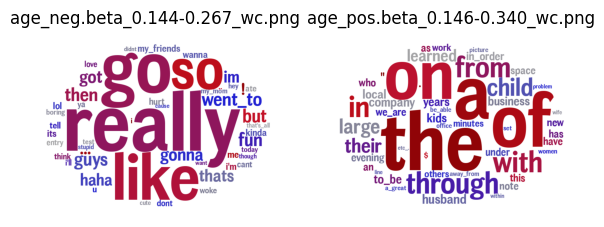

In [ ]:
#@markdown Click the Play button to view the **word cloud image** of the analyzed file.

from dlatk.tools.colab_methods import print_wordclouds

feature_table_name = feature_table_dropdown.value.replace('$', '.')
outcomes = outcomes_widget.value
controls = controls_widget.value
# group_freq_threshold = group_freq_threshold_widget.value

wordcloud_file_name = f"{feature_table_name}.{outcomes}.{controls}__0.freq100._tagcloud_wordclouds"
print(wordcloud_file_name)
print_wordclouds(wordcloud_file_name)



<a name="data"></a>
# Recommended upload data format

**Note: This setup data section is optional.** Read below if you wish to understand how to format data.

<br />

DLATK uses data in CSV (comma-seprated value) format. Your csv needs at least two columns:
* **`message`**: contains the text to be analyzed.
* **`message_id`**: contains a unique id for each message.

The CSV may also have other columns, including other ids you may wish to analyze your data by (e.g. `user_id`). For example,

|message_id|message|user_id|created_date|
|----------|-------|-------|------------|
|17557|urlLink Ananova - New rules on pizza to be introduced|1405024|2004-05-27|
|15996|I just read John Kerry's nomination acceptance speech. Christ, he can talk.  God bless America.|3523319|2004-07-29|
|27462| Talk about 'better late than never'...   urlLink  Couple Living Together 77 Years Marries   .   Thanks to  urlLink  Zorak  for the link.|942828|2003-04-04|

<br />
<br />

👉 If you wish to use the [default tutorial dataset](https://github.com/dlatk/dlatk/blob/colab_csv/dlatk/data/colab_dataset.md), then you can skip directly to the [Run Differential Language Analysis](#dla) section. The default dataset contains the files mentioned below -
* `msgs404u.csv` - language data from 404 blog authors.
* `users404.csv` - age, gender, and occupation for the 404 authors.

<br />

👉 Read below if you wish to use your own data.

<br/>

<a name="dla"></a>
# Run Differential Language Analysis (DLA)

<img src="https://drive.google.com/uc?export=view&id=1TArhnhbdHThRL8_sebYBgkWkxZdQ9b_P" height="350" width="700"/>

<br/>



In [ ]:
#@title Select Text and ID column (unit of analysis)

#@markdown Click the __play button__ at the top left, and a dropdown option will appear.

#@markdown __Choose__ the text and ID columns you wish to use as the unit of analysis and click "Confirm Selection."

import csv
import ipywidgets as widgets
from IPython.display import display, clear_output

def get_available_columns(file_path):
    """Read the first row of the CSV file to get the column names."""
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader, None)
    return headers

available_columns = get_available_columns(file_path)

# Text column options: Exclude columns that are "user" or end with "_id"
text_column_options = [col for col in available_columns if col != "user" and not col.endswith("_id")]

# ID column options: Only include columns that end with "_id"
id_column_options = [col for col in available_columns if col.endswith("_id")]

text_column_dropdown = widgets.Dropdown(
    options=text_column_options,
    description='Text Column:',
)

id_column_dropdown = widgets.Dropdown(
    options=id_column_options,
    description='ID Column:',
)

output = widgets.Output()

confirm_button = widgets.Button(description="Confirm Selection")

def on_confirm_button_clicked(b):
    global text_column_name, id_column_name
    text_column_name = text_column_dropdown.value
    id_column_name = id_column_dropdown.value
    with output:
        clear_output()
        print(f'Text Column confirmed: {text_column_name}')
        print(f'ID Column confirmed: {id_column_name}')

confirm_button.on_click(on_confirm_button_clicked)

display(text_column_dropdown, id_column_dropdown, confirm_button, output)


<IPython.core.display.Javascript object>

Dropdown(description='Text Column:', options=('created_date', 'chat'), value='created_date')

Dropdown(description='ID Column:', options=('message_id', 'chat_id', 'user_id'), value='message_id')

Button(description='Confirm Selection', style=ButtonStyle())

Output()

In [ ]:
#@title Select Text and ID column (unit of analysis)

#@markdown Click the __play button__ at the top left, and a dropdown option will appear.

#@markdown __Choose__ the text column you wish to use as the unit of analysis and click "Confirm Selection."

import csv
import ipywidgets as widgets
from IPython.display import display, clear_output

def get_available_columns(file_path):
    """Read the first row of the CSV file to get the column names."""
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader, None)
    return headers

# Get available columns from the uploaded file
#available_columns = headers
available_columns = get_available_columns(file_path)

# Filter available columns for "message_id" and "user_id"
group_id_options = [col for col in available_columns if col in ["message_id", "user_id"]]

# Create a dropdown for selecting the group_id based on available columns
group_id_dropdown = widgets.Dropdown(
    options=group_id_options,
    value=group_id_options[0] if group_id_options else None,  # Default to first option or None
    description='ID Column:',
)

# Output widget for displaying selected group_id
output = widgets.Output()

# Button for confirming the group_id selection
confirm_button = widgets.Button(description="Confirm Selection")

# Function to update the group_id and display confirmation
def on_confirm_button_clicked(b):
    global group_id
    group_id = group_id_dropdown.value
    with output:
        clear_output()
        print(f'Group ID confirmed: {group_id}')

confirm_button.on_click(on_confirm_button_clicked)

# Display the dropdown, button, and output widget
display(group_id_dropdown, confirm_button, output)


<IPython.core.display.Javascript object>

Dropdown(description='ID Column:', options=('message_id', 'user_id'), value='message_id')

Button(description='Confirm Selection', style=ButtonStyle())

Output()

**dlatkInferface.py.** <br />
<hr />

The most popular way people use dlatk is through it's command interface: `dlatkInterface.py`.

For all the commands, DLATK takes in the following **mandatory settings** -

>  **`-d`** - **d**atabase that will contain all data dlatk work with. This is often just your project name. <br />
 **`-t`** - message **t**able here our text lives. If it's not loaded yet (as in this case), we can provide the name of the CSV file to be loaded into the database. <br />
 **`-g`** - **g**roup_id, the table column we will aggregate (unit of analysis).

`
<hr />
<br />


## DLA: Step 1 - Extract word and phrase (ngrams) features

The first step of DLA is to extract features from the language. Here, we do this by extracting words and word phrases known as ngrams or "tokens" -- this process of splitting sequences of letters into words is called "tokenization".

<br/>

To do this, we use the following **ngram extraction flags** in addition to the mandatory settings.
> **`--add_ngrams`** - the flag which starts the ngram extraction process<br />
 **`-n 1 [2] [3]`** -  the value or values for n in ngrams<br />
 **`--combine_feat_tables [NAME]`** - there will be 1 feature table for each `n`, this command concatenates them into one table with the provided `NAME`.
 <br />

In [ ]:
#@markdown After uploading, specify the group_id, ngram values (e.g., 1 for unigrams, 2 for bigrams), and an optional name for the combined feature table.
#@markdown If it is empty, check the last line of yellow result box to see which table is formed.

select_text_column = "user_id" #@param ["message_id", "user_id"] {type:"string"}
group_id = select_text_column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re

# Assume file_name is set to the name of the uploaded file
table_name = file_name  # Use the file_name from Part 1

database_name = "colab_csv"
ngram_values = "1 2" #@param ["1 2", "1 3"] {type:"string"}
combined_feature_table_name = "" #@param {type:"string"}

# Automatically assign combined_feature_table_name based on ngram_values if not specified
if not combined_feature_table_name:
    ngram_parts = ngram_values.split()
    if len(ngram_parts) == 1:
        combined_feature_table_name = f"{ngram_parts[0]}gram"
    else:
        combined_feature_table_name = 'to'.join([f"{part}gram" for part in ngram_parts])

# Form the DLATK command
!dlatkInterface.py -d {database_name} -t {table_name} -g {group_id} \
--add_ngrams -n {ngram_values} \
--combine_feat_tables {combined_feature_table_name}

print("Table called " + combined_feature_table_name + " is formed")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-03-15 04:41:59
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
query: PRAGMA table_info(msgs100utest)
SQL Query: DROP TABLE IF EXISTS feat$1gram$msgs100utest$user_id
SQL Query: CREATE TABLE feat$1gram$msgs100utest$user_id ( id INTEGER PRIMARY KEY, group_id INTEGER, feat VARCHAR(36), value INTEGER, group_norm DOUBLE)


Creating index correl_field on table:feat$1gram$msgs100utest$user_id, column:group_id 


SQL Query: CREATE INDEX correl_field$1gram$msgs100utest$user_id ON feat$1gram$msgs100utest$user_id (group_id)


Creating index feature on table:feat$1gram$msgs100utest$user_id, column:feat 


SQL Query: CREATE INDEX feature$1gram$msgs100utest$user_id ON feat$1gram$msgs100utest$user_id (feat)
query: PRAGMA table_info(msgs100utest)
SQL Query: DROP TABLE IF EXISTS feat$meta_1gram$msgs100utest$user_id
SQL Query: CREATE TABLE feat$meta_1gram$msgs100utest

👆 If you see `DLATK exits with success!` then the command ran successfully and

---

the features are ready!
<hr />
<br />
<br />


To check the created feature tables, you can use the **`--show_feat_tables`** flag as shown below.

In [ ]:
#@title Feature Tables Management { display-mode: "form" }
#@markdown **Click play button** to list feature tables based on your previously uploaded file, save them, and select a table to view

#@markdown After choose it, within 3 seconds you will see the first 10 rows of the message table and the first 10 of the feature table

import re
import subprocess
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assume `file_name` is already defined in your environment
database_name = "colab_csv"

def sanitize_file_name(file_name):
    base_file_name = re.sub(r" \(\d+\)", "", file_name)
    if not base_file_name.endswith('.csv'):
        base_file_name += '.csv'
    return base_file_name

def list_feature_tables(database_name, table_name):
    command = f"dlatkInterface.py -d {database_name} -t {table_name} --show_feat_tables"
    process = subprocess.run(command, shell=True, text=True, capture_output=True)
    output_lines = process.stdout.split('\n')
    table_names = [line.strip() for line in output_lines if line.startswith("feat$")]
    return table_names

def save_feature_tables(table_names):
    with open("available_feature_tables.txt", "w") as file:
        for table_name in table_names:
            file.write(f"{table_name}\n")

def get_feature_table_options():
    with open("available_feature_tables.txt", "r") as file:
        return [line.strip() for line in file.readlines() if line.strip()]

def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        selected_table = change['new']
        command = f"dlatkInterface.py -d {database_name} -t '{sanitize_file_name(file_name)}' -g user_id -f '{selected_table}' --view_tables"
        process = subprocess.run(command, shell=True, text=True, capture_output=True)
        print(process.stdout)

# List feature tables
base_file_name = sanitize_file_name(file_name)
table_names = list_feature_tables(database_name, base_file_name)

# Save feature tables to a file for dropdown
save_feature_tables(table_names)

# Create and display dropdown for selecting feature tables
feature_table_options = get_feature_table_options()
dropdown = widgets.Dropdown(options=feature_table_options, description='Select Table:')
dropdown.observe(on_dropdown_change, names='value')
display(dropdown)




Connecting to SQLite database: /content/sqlite_data/colab_csv.db
     message_id        user_id   created_date        message
              1         743739     2004-07-21 urlLink ESPN.c
              2         743739     2004-07-20 Well, this wil
              3         743739     2004-07-20 urlLink Cartoo
              4         743739     2004-07-20 Just like the 
              5         743739     2004-08-05 It has come to
              6         743739     2004-08-03 urlLink ESPN.c
              7         743739     2004-08-02 So let me see 
              8         743739     2004-08-01 Ok, quick trip
              9         743739     2004-08-09 urlLink ebay i
             10         743739     2004-08-09 urlLink Help o
             id       group_id           feat          value     group_norm
              1         743739        urllink              6 0.002970297029
              2         743739       espn.com              2 0.000990099009
              3         743739    

👆 Scroll and you should see the first 10 rows of the message table and the first 10 of the feature table.

<br />


👆 Example of feature tables when you input **group_id as user_id, ngram_values as 1 2, combined_feature_table_name as empty**
```
feat$1gram$msgs404u$user_id
feat$meta_1gram$msgs404u$user_id
feat$2gram$msgs404u$user_id
feat$meta_2gram$msgs404u$user_id
feat$1to2gram$msgs404u$user_id
```

1.   `feat$1gram$msgs404u$user_id` contains the 1grams (single words).
2.   `feat$meta_1gram$msgs404u$user_id` contains count data about 1grams.

Similarly `feat$2gram$msgs404u$user_id` and `feat$meta_2gram$msgs404u$user_id` contain 2grams and their count data respectively, while `feat$1to2gram$msgs404u$user_id` is the concatenated table from `feat$1gram$msgs404u$user_id` and `feat$2gram$msgs404u$user_id`.

<hr />

<br />

<hr />

So, what is a **Feature Table**? - A feature table is a data type to store extracted representations of the language. All feature tables contain at least the below columns -

* `group_id` - individual units of analysis (group) of data
* `feat` - extracted features, which can be tokens or lexicon features (to be discussed), embeddings, etc.
* `value` - frequency value of the feature in the group.
* `group_norm` - the normalized frequency of the feature (i.e. the relative frequency of the word) within the group.

<hr />
<br />

# Colab Frontend: Data visualize on table


## DLA: Step 2 - Feature Filtering

The number of distinct tokens can be large in comparison to the sample size. However, a lot of these tokens are particular to just 1 or 2 examples (see [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law) ), and not representative of the sample, and hence can be eliminated. Flags required to **filter such outlying words/phrases** are:

> **`--feat_occ_filter`** - create a new feature table with infrequent features removed.<br />
 **`--set_p_occ`** - features used by less than this percentage of groups are dropped. <br />
 **`--feat_colloc_filter`** - create a new feature table without rare sequences of words (limiting to [collocations](https://nlp.stanford.edu/fsnlp/promo/colloc.pdf)).

<br/>

Similarly, when running filters, it is also good to specify a minimum word count per group (user in this case) required for the group to be considered:

> **`--group_freq_thresh`** -  ignore groups which do not contain a certain number of words when running analyses (e.g. when calculating p_occ)

In [ ]:
#@markdown Please adjust the parameters below as per your dataset and analysis requirements before executing the command.

#@markdown **Group Freq Threshold:** Minimum number of words per group for the group to be considered:
#@markdown **(limit 0 to 500)**

#@markdown **Percentage Occurrence:** Percentage threshold for feature occurrence (features used by less than this percentage of groups are dropped):
#@markdown **(limit 0 to 1)**

import re
import subprocess
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assume file_name is set to the name of the uploaded file
database_name = "colab_csv"

def sanitize_file_name(file_name):
    """Sanitizes the file name to ensure it ends with '.csv'."""
    base_file_name = re.sub(r" \(\d+\)", "", file_name)
    if not base_file_name.endswith('.csv'):
        base_file_name += '.csv'
    return base_file_name

def update_feature_table_options():
    """Updates the available feature table options by re-reading the saved file."""
    with open("available_feature_tables.txt", "r") as file:
        options = [line.strip() for line in file.readlines() if line.strip()]
    dropdown.options = options

# Function to execute the DLATK command and update feature table list
def on_submit_clicked(b):
    clear_output(wait=True)
    selected_table = dropdown.value
    group_freq_threshold = group_freq_threshold_widget.value
    percentage_occurrence = percentage_occurrence_widget.value
    command = f"dlatkInterface.py -d {database_name} -t {sanitize_file_name(file_name)} --group_freq_thresh {group_freq_threshold} -f '{selected_table}' --feat_occ_filter --set_p_occ {percentage_occurrence} --feat_colloc_filter"

    print("Executing command:", command)
    process = subprocess.run(command, shell=True, text=True, capture_output=True)
    if process.stdout:
        print(process.stdout)
    if process.stderr:
        print("Error:", process.stderr)

    # After executing the command, update the list of feature tables
    command_list_tables = f"dlatkInterface.py -d {database_name} -t {sanitize_file_name(file_name)} --show_feat_tables"
    process_list = subprocess.run(command_list_tables, shell=True, text=True, capture_output=True)
    output_lines = process_list.stdout.split('\n')
    table_names = [line for line in output_lines if line.startswith("feat$")]
    with open("available_feature_tables.txt", "w") as file:
        for table_name in table_names:
            file.write(f"{table_name}\n")

    update_feature_table_options()

base_file_name = sanitize_file_name(file_name)

# Input widgets for group frequency threshold and percentage occurrence
group_freq_threshold_widget = widgets.IntText(value=100, description='Group Freq Threshold:', style={'description_width': 'initial'})
percentage_occurrence_widget = widgets.FloatText(value=0.10, description='Percentage Occurrence:', style={'description_width': 'initial'})

# Initialize dropdown with available feature tables
feature_table_options = []
dropdown = widgets.Dropdown(options=feature_table_options, description='Feature Table:')

# Button to submit and execute the command with the selected and inputted parameters
submit_button = widgets.Button(description="Run Command")
submit_button.on_click(on_submit_clicked)

# Display the widgets
display(dropdown, group_freq_threshold_widget, percentage_occurrence_widget, submit_button)

# Initially populate the dropdown with existing feature tables
update_feature_table_options()


👆 If you see `DLATK exits with success!`, then you have successfully filtered the features. The name of the filtered feature table - `{Feature Table}$0_1$pmi3_0`.
<hr />
<br />

To validate the structure and content of the created table, you can use `--view_tables` like above.

## DLA: Step 3 - Correlate (or associate) features with outcomes



👇 For example, the command below associates the ngram features (`feat$1to2gram$msgs404u$user_id$0_1$pmi3_0`) with the `age` of the user, controlling for `gender`, and store the results into an HTML file, by default using [standardized multiple regression](link).

In [ ]:
import re
from google.colab import files
import os

#@markdown ### Step 1: Select Default Dataset or Upload from Desktop
#@markdown Choose a default dataset from the dropdown or leave it as "Upload from desktop" to upload your dataset.

# This is a dropdown for choosing between default datasets or uploading your own
default_dataset = "users404.csv" #@param ["Upload from desktop", "users100.csv", "users404.csv"]

# Function to check if the file exists (for local files)
def file_exists(file_path):
    return os.path.exists(file_path)

# Sanitizes file names to ensure they end with '.csv'
def sanitize_file_name(file_name):
    base_file_name = re.sub(r" \(\d+\)", "", file_name)
    if not base_file_name.endswith('.csv'):
        base_file_name += '.csv'
    return base_file_name

file_path = None  # Initialize file_path variable

if default_dataset != "Upload from desktop":
    # If a default dataset is selected, set the file_path accordingly
    outcome_table_name = sanitize_file_name(default_dataset)
    file_path = os.path.join("/content", outcome_table_name)
    print(f'Default dataset selected: {outcome_table_name}')
else:
    #@markdown If you choose to upload from the desktop, use the "Choose Files" button that will appear when running this cell.
    print("Please upload a dataset from the desktop.")
    uploaded_files = files.upload()
    if uploaded_files:
        # Assuming only one file is uploaded, use its name
        filename = next(iter(uploaded_files))
        outcome_table_name = sanitize_file_name(filename)  # Sanitize the uploaded file's name
        file_path = os.path.join("/content", outcome_table_name)
        print(f'Uploaded dataset name: {outcome_table_name}')
    else:
        print("No dataset uploaded. Please upload a dataset to proceed.")

# Verify the file's existence and readiness for use
if file_path and file_exists(file_path):
    print(f'Dataset ready for use: {file_path}')
else:
    print("Dataset not found. Please ensure the dataset exists and try again.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Default dataset selected: users404.csv
Dataset ready for use: /content/users404.csv


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import csv

#@markdown Please **adjust the parameters** below as per your dataset and analysis requirements before executing the command.

# Ensure 'outcome_table_name' and other variables are defined and accessible in this scope
if 'outcome_table_name' in globals():
    # Open and read the CSV file to extract column names
    with open(outcome_table_name, newline='') as csvfile:
        reader = csv.reader(csvfile)
        column_headers = next(reader, None)

    if column_headers:
        feature_table_options = get_feature_table_options()
        feature_table_dropdown = widgets.Dropdown(options=feature_table_options, description='Feature Table:')

        outcomes_widget = widgets.Dropdown(options=column_headers, description='Outcomes:')
        controls_widget = widgets.Dropdown(options=column_headers, description='Controls:')
        cat_to_bin_widget = widgets.Dropdown(options=column_headers, description='Cat to Bin:')

        # Checkbox for making wordclouds
        make_wordclouds_checkbox = widgets.Checkbox(value=False, description='Make Wordclouds')

        def on_submit(change):
            clear_output(wait=True)
            outcomes = outcomes_widget.value
            controls = controls_widget.value
            cat_to_bin = cat_to_bin_widget.value
            feature_table_name = feature_table_dropdown.value  # Get the selected feature table
            group_freq_threshold = group_freq_threshold_widget.value  # Assume this is defined and accessible
            make_wordclouds = make_wordclouds_checkbox.value  # Check if wordclouds should be made


            # Construct the command with the selected feature table and other parameters
            command = (
                f"dlatkInterface.py -d {database_name} -t {table_name} -g {group_id} "
                f"--group_freq_thresh {group_freq_threshold} "
                f"--feat_table '{feature_table_name}' "
                f"--outcome_table {outcome_table_name} --outcomes {outcomes} "
                f"--controls {controls} --cat_to_bin {cat_to_bin} --rmatrix"
            )
            if make_wordclouds:
                command += " --make_wordclouds"
            print("Command to execute:", command)
            process = subprocess.run(command, shell=True, text=True, capture_output=True)
            print(process.stdout)
            if process.stderr:
                print("Error:", process.stderr)

        submit_button = widgets.Button(description="Submit")
        submit_button.on_click(on_submit)

        # Display the widgets including the feature table dropdown
        display(feature_table_dropdown, outcomes_widget, controls_widget, cat_to_bin_widget,make_wordclouds_checkbox, submit_button)
    else:
        print("Failed to read column names from the outcome table.")
else:
    print("Outcome table name not set. Please ensure a file is uploaded in Part 1.")

Outcome table name not set. Please ensure a file is uploaded in Part 1.


👆 If you see `DLATK exits with success!` then the command executed successfully. The command should have stored an HTML (`feat.1to2gram.msgs404u.user_id.0_1.pmi3_0.age.gender__0.freq100.rMatrix.html`) with the results in the `Files` tab.

<br/>

<img src="https://drive.google.com/uc?export=view&id=1R_sk7opK6FoZk1y2U8dCTsJA_PvytQhh" height="250" width="500"/>

<hr />
<br />

In addition to the tabular format, you can also observe the correlated features in the form of a word clouds. Flags required are **`--make_wordclouds`** (as shown below).



👆 The above command produces the HTML (as above) and wordclouds stored in the `feat.1to2gram.msgs404u.user_id.0_1.pmi3_0.age.gender__0.freq100._tagcloud_wordclouds` folder under the `Files` tab.

<br/>

<img src="https://drive.google.com/uc?export=view&id=14r8SEs4k-2otKqsxjKHySyQF-0KV3NI0" height="250" width="500"/>

<hr />
<br />
<br />

You can view the word clouds using the `print_wordclouds()` function below which takes in the path to the folder containing the word clouds. For example, to view the word clouds extracted earlier, the command would be - `print_wordclouds("feat.1to2gram.msgs404u.user_id.0_1.pmi3_0.age.gender__0.freq100._tagcloud_wordclouds")`.

In [ ]:
#@markdown Click run button see **word cloud image**

from dlatk.tools.colab_methods import print_wordclouds

feature_table_name = feature_table_dropdown.value.replace('$', '.')
outcomes = outcomes_widget.value
controls = controls_widget.value
group_freq_threshold = group_freq_threshold_widget.value

wordcloud_file_name = f"{feature_table_name}.{outcomes}.{controls}__0.freq{group_freq_threshold}._tagcloud_wordclouds"
print(wordcloud_file_name)
print_wordclouds(wordcloud_file_name)



<IPython.core.display.Javascript object>

NameError: name 'feature_table_dropdown' is not defined

## DLA: Using Other Features - Lexicon Features (Optional)

You can also generate language features from a lexicon (calculate the proportion of the lexicon present in the text) of your choice.

Sometimes this is as simple as aggregating counts (in case of unweighted lexicon like LIWC) while sometimes there is a weighting factor involved (in case of weighted lexicon like NRC).

<br/>

You need to provide the below flags in addition to mandatory settings -

* **`--add_lex_table -l LEX_TABLE_NAME`** - commands DLATK to add the lexicon from `LEX_TABLE_NAME`
* **`--weighted_lexicon` [Optional]** - flag to mention that the lexicon type is weighted.

👇 For example, you can extract features from *NRC sentiment* dictionary as shown below.

In [ ]:
import subprocess

#@title DLATK Lexicon Feature Configuration

#@markdown Enter the database name:
database_name = "colab_csv" #@param {type:"string"}

#@markdown Enter the name of your message table or CSV file:
table_name = "msgs404u.csv" #@param {type:"string"}

#@markdown Enter the column name to be used as group_id:
group_id = "user_id" #@param {type:"string"}

#@markdown Minimum number of words per group for the group to be considered:
group_freq_threshold = 100 #@param {type:"integer"}

#@markdown Enter the name of the lexicon table to be used:
lexicon_table_name = "nrc_sent" #@param {type:"string"}

#@markdown Indicate if the lexicon is weighted (leave unchecked for unweighted lexicon):
is_weighted_lexicon = True #@param {type:"boolean"}

# Building the command string
command = f"dlatkInterface.py -d {database_name} -t {table_name} -g {group_id} --group_freq_thresh {group_freq_threshold} "
command += f"--add_lex_table -l {lexicon_table_name} "
if is_weighted_lexicon:
    command += "--weighted_lexicon"

# Executing the command and capturing the output
process = subprocess.run(command, shell=True, text=True, capture_output=True)

# Print the output
print(process.stdout)

# Check for errors
if process.stderr:
    print("Error:", process.stderr)


<IPython.core.display.Javascript object>



Connecting to SQLite database: /content/sqlite_data/colab_csv.db
query: PRAGMA table_info(msgs404u)


Creating index correl_field on table:feat$cat_nrc_sent_w$msgs404u$user_id$1gra, column:group_id 




Creating index feature on table:feat$cat_nrc_sent_w$msgs404u$user_id$1gra, column:feat 



Error: TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-02-01 23:37:04
-----
SQL Query: DROP TABLE IF EXISTS feat$cat_nrc_sent_w$msgs404u$user_id$1gra
SQL Query: CREATE TABLE feat$cat_nrc_sent_w$msgs404u$user_id$1gra ( id INTEGER PRIMARY KEY, group_id INTEGER, feat VARCHAR(10), value INTEGER, group_norm DOUBLE)
SQL Query: CREATE INDEX correl_field$cat_nrc_sent_w$msgs404u$user_id$1gra ON feat$cat_nrc_sent_w$msgs404u$user_id$1gra (group_id)
SQL Query: CREATE INDEX feature$cat_nrc_sent_w$msgs404u$user_id$1gra ON feat$cat_nrc_sent_w$msgs404u$user_id$1gra (feat)
WORD TABLE feat$1gram$msgs404u$user_id
4 out of 404 group Id's processed; 0.

In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs404u.csv -g user_id --group_freq_thresh 100 \
  --add_lex_table -l nrc_sent \
  --weighted_lexicon

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-02-01 23:37:33
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
query: PRAGMA table_info(msgs404u)
SQL Query: DROP TABLE IF EXISTS feat$cat_nrc_sent_w$msgs404u$user_id$1gra
SQL Query: CREATE TABLE feat$cat_nrc_sent_w$msgs404u$user_id$1gra ( id INTEGER PRIMARY KEY, group_id INTEGER, feat VARCHAR(10), value INTEGER, group_norm DOUBLE)


Creating index correl_field on table:feat$cat_nrc_sent_w$msgs404u$user_id$1gra, column:group_id 


SQL Query: CREATE INDEX correl_field$cat_nrc_sent_w$msgs404u$user_id$1gra ON feat$cat_nrc_sent_w$msgs404u$user_id$1gra (group_id)


Creating index feature on table:feat$cat_nrc_sent_w$msgs404u$user_id$1gra, column:feat 


SQL Query: CREATE INDEX feature$cat_nrc_sent_w$msgs404u$user_id$1gra ON feat$cat_nrc_sent_w$msgs404u$user_id$1gra (feat)
WORD TABLE feat$1gram$msgs404u$user_id
4 out of 404 group Id's processed; 0.01 compl

👆 The command executed successfully if `DLATK exits with success!`.

<hr />

<br />

You should see the name of the new feature table - `feat$cat_nrc_sent_w$msgs404u$user_id$1gra`, which you can validate like earlier.


In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs404u.csv -g user_id \
  -f 'feat$cat_nrc_sent_w$msgs404u$user_id$1gra' \
  --view_tables

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-02-01 23:37:45
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db

Printing: msgs404u
----

     message_id        user_id   created_date        message
          17236         174357     2004-06-28     You Are Ri
          17237         174357     2004-06-24     Im so tire
          17238         174357     2004-07-28     So I start
          25669         446275     2004-05-28     I just don
          25670         446275     2004-05-25     [this is a
          25671         446275     2004-05-24     Another th
          25672         446275     2004-05-16     I come bac
          25673         446275     2004-05-16     As any goo
          25674         446275     2004-05-15     A previous
          25675         446275     2004-05-15     If those h

Printing: feat$cat_nrc_sent_w$msgs404u$user_id$1gra
----

             id       group_id           fe

👆 You should see the contents of `feat$cat_nrc_sent_w$msgs404u$user_id$1gra`
<hr />

<br />

Once you have represented your data samples in terms of lexicon features, you can also correlate them with outcomes, by changing the feature table in `--feat_table` (in this case `--feat_table 'feat$cat_nrc_sent_w$msgs404u$user_id$1gra'`). Everything else in the command remains the same.

Now, correlate the new set of features against `age` controlling for `gender`, like you did above.

In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs404u.csv -g user_id --group_freq_thresh 100 \
  --feat_table 'feat$cat_nrc_sent_w$msgs404u$user_id$1gra' \
  --outcome_table users404.csv --outcomes age \
  --controls gender --cat_to_bin gender \
  --rmatrix

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-01-17 03:12:54
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Loading Outcomes and Getting Groups for: {'age', 'gender'}
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Yielding data over ['age'], adjusting for: ['gender__0'].
Yielding norms with zeros (404 groups * 4 feats).
                                 OLS Regression Results                                
Dep. Variable:                    age   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              2.999
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                      0.0841
Time:                        03:12:54   Log-Likelihood:       

👆 The above command produces an HTML (`feat.cat_nrc_sent_w.msgs404u.user_id.1gra.age.gender__0.freq100.rMatrix.html`) with the results, under the `Files` tab.

<br/>

# Running Prediction (Language-based Assessment)

<img src="https://drive.google.com/uc?export=view&id=1AgMttURoLyJZ6WhL9wnVzWBt1gSmE0yE" height="350" width="550"/>

## Prediction: Example 1: N-Fold Cross Validation

There are two types of [prediction models](https://scikit-learn.org/stable/modules/linear_model.html#) we can run:
1. **Regression**, which is the prediction of a continous variable, and
2. **Classification**, which is the prediction of a categorical variable.

<br/>

<hr/>

[N-Fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#) - This method involves randomly dividing the dataset into *N* groups, or "folds", of approximately equal size. The model is later fit on the N-1 folds (*train* data) and the evaluated for accuracy over the remaining one fold (*test* data).

<hr/>

<br/>

For running a prediction model against an outcome, you use the same data setup commands as in correlations:
* **`-f FEAT_TABLE_NAME`** - names of the feature table.
* **`--outcome_table NAME`** - the name of the table with outcomes.
* **`--outcomes OC1 [OC2...]`** - list of outcomes to predict.


### N-Fold Regression:


Below are the flags to perform regression using cross-validation:
* **`--nfold_test_regression`** - this activates regression using n-fold cross-validation.
* **`--model MODEL_NAME`** - which regression model to use (some examples would be ordinary least sqaures, ridge regression, etc.)

👇 For example, below command will predict `age` from 1gram and 2grams features using a ridge regression model over `5` fold cross validation.

In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs404u.csv -g user_id --group_freq_thresh 100 \
  --outcome_table users404.csv --outcomes age \
  --feat_table 'feat$1to2gram$msgs404u$user_id$0_1' \
  --nfold_test_regression --model ridgecv

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-01-31 17:48:15
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Loading Outcomes and Getting Groups for: {'age'}
Traceback (most recent call last):
  File "/usr/local/bin/dlatkInterface.py", line 2255, in <module>
    main()
  File "/usr/local/bin/dlatkInterface.py", line 1899, in main
    comboScores = rp.testControlCombos(sparse = args.sparse, blacklist = blacklist,
  File "/usr/local/lib/python3.10/dist-packages/dlatk/regressionPredictor.py", line 803, in testControlCombos
    (groups, allOutcomes, allControls, foldLabels) = self.outcomeGetter.getGroupsAndOutcomes(groupsWhere = groupsWhere, includeFoldLabels=True)
  File "/usr/local/lib/python3.10/dist-packages/dlatk/outcomeGetter.py", line 429, in getGroupsAndOutcomes
 

👆 Above the settings, you should see a dictionary containing accuracy metrics from cross validation. Key metrics are `r` and `mae`:
```
[TEST COMPLETE]

{'age': {(): {1: {'N': 404,
                  ...
                  'mae': 5.392188704337425,
                  'num_features': 2308,
                  'r': 0.580652941321456,
                  ...}}}}
```
`mae` is the mean absolute error aggregated across all examples from when they were in a test fold. In this case, the model on average is off in predicting age by 5.4 years.

`r` is the Pearson correlation between the predicted age and the self-reported age. The correlation is a nice accuracy metric for regression prediction tasks  since it is bounded at 1 being a perfect prediction and 0 being what is expected by chance.  

DLATK uses 5 folds by default, but you can change this by adding the
`--folds K` parameter.

<br/>


### N-Fold Classification


Similarly, you can also perform classification using cross-validation using the below flags:

* **`--nfold_test_classifiers`** - activates classification using cross-validation.
* **`--model MODEL_NAME`** - classification model to use (for example logistic regression, etc.).

<br/>

You can also store the prediction output to a CSV with the below flags:
* **`--csv`** - Saves the results to a csv file instead of printing to the screen, like with `--correlate`.
* **`--pred_csv`** - write the predicted scores for the sample to a separate CSV prefixed with the name in `--output_name`.

<br/>

👇 Try predicting if a user is a student or not (`is_student`) from their 1gram and 2gram features using Logistic Regression (`lr`) in 5 fold cross-validation.

In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs404u.csv -g user_id --group_freq_thresh 100 \
  --outcome_table users404.csv --outcomes is_student  \
  --feat_table 'feat$1to2gram$msgs404u$user_id$0_1' \
  --nfold_test_classifiers --model lr

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-01-17 03:15:18
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Loading Outcomes and Getting Groups for: {'is_student'}
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
[number of groups: 255 (5 Folds)] non-stratified / using same folds for all outcomes


|COMBO: ()|

= is_student (w/ lang.)=
------------------------

Fold 0 
   (feature group: 0): [Initial size: 255]
[Train size: 204    Test size: 51]
[Applying StandardScaler to X[0]: StandardScaler()]
 X[0]: (N, features): (204, 2308)
[Training classification model: lr]
model: LogisticRegression(C=0.01, random_state=42) 
  predict: applying standard scaler to X[0]: StandardScaler()
  predict: combined X shape: (51, 2308)
  predict: classifier intercept: [-0.4276829]
 *confusion matrix: 
[[23  5]
 [10 13]]
 *precision an

👆 The above command produce the key validation metrics like `acc` (accuracy) which gives the fraction of users correctly classified as student (`72.2%` in this case), [f1 score](https://en.wikipedia.org/wiki/F-score), and [auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) -

```
[is_student]
   NO CONTROLS
     + LANG: acc: 0.722, f1: 0.708, auc: 0.745 (p_vs_controls = 1.0000)
   (mfc_acc: 0.561)
```

<br/>

## Prediction - Example 2: Training and Deploying a model.

### Train and Deploy - Step 1: Train and save a model


Another approach is to train a predictive model, store it and use it to predict the outcomes in a different dataset.

<br/>

In addition to the flags that point to the right tables, flags necessary for this command are -

* **`--train_regression`** - trains a regression model.
* **`--model MODEL_NAME`** - which machine learning model to use.
* **`--save_model --picklefile FILENAME`** - saves the model into a pickle file `FILENAME`

<br/>

👇 In the below example, you will build and save a model (using [ridge regression](what_is_ridge) with a penalty of 1000) that predicts `age` from 1gram and 2gram features (`feat$1to2gram$msgs404u$user_id$0_1`), and save it into a file named `age.1to2grams.ridge1000.gft100.pickle`.

In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs404u.csv -g user_id --group_freq_thresh 100 \
  --outcome_table users404.csv --outcomes age  \
  -f 'feat$1to2gram$msgs404u$user_id$0_1' \
  --train_regression --model ridge1000 \
  --save_model --picklefile age.1to2grams.ridge1000.gft100.pickle

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-01-17 03:15:47
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Loading Outcomes and Getting Groups for: {'age'}
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
[number of groups: 404]

= age =
-------
  (feature group: 0)
   [Train size: 404 ]
 X[0]: (N, features): (404, 2308)
  [Applying StandardScaler to X[0]: StandardScaler()]
[COMBINED FEATS (from multiX)] Combined size: (404, 2308)
[COMBINED FEATS: Training regression model: ridge1000]
model: Ridge(alpha=1000) 

[TRAINING COMPLETE]

[Saving age.1to2grams.ridge1000.gft100.pickle]
-------

Settings:

Database - colab_csv
Corpus - msgs404u.csv
Group ID - user_id
Feature table(s) - feat$1to2gram$msgs404u$user_id$0_1
Outcome table - users404.csv
Outcome(s) - age
-------
Interface Runtime: 1.16 seconds
DLATK exits with s

### Train and Deploy - Step 2: Predict from new data



Once you have trained a model to predict an outcome, you can use it to predict from unseen data (or *test* data).

👉 If you wish to use a default *test* dataset, skip the next command.

👇 To load your dataset to test the model, you can use the `upload_dataset` function from the [Setup data](#data) section above.

In [ ]:
from dlatk.tools.colab_methods import upload_dataset
upload_dataset()

<IPython.core.display.Javascript object>

IndexError: list index out of range

👇 You need to extract the same set of features as the ones used to train the predictive model. So, extract 1gram and 2gram features, used by atleast 10% of the groups, and consider only the groups with atleast 100 tokens.

In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs100u.csv -g user_id --group_freq_thresh 100 \
  --add_ngrams -n 1 2 \
  --combine_feat_tables 1to2gram \
  --feat_occ_filter --set_p_occ 0.10

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-01-17 03:15:55
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
SQL Query: CREATE TABLE msgs100u (message_id INT, user_id INT, created_date VARCHAR(10), message LONGTEXT);
Importing data, reading msgs100u.csv file
Reading remaining 741 rows into the table...
query: PRAGMA table_info(msgs100u)
SQL Query: DROP TABLE IF EXISTS feat$1gram$msgs100u$user_id
SQL Query: CREATE TABLE feat$1gram$msgs100u$user_id ( id INTEGER PRIMARY KEY, group_id INTEGER, feat VARCHAR(36), value INTEGER, group_norm DOUBLE)


Creating index correl_field on table:feat$1gram$msgs100u$user_id, column:group_id 


SQL Query: CREATE INDEX correl_field$1gram$msgs100u$user_id ON feat$1gram$msgs100u$user_id (group_id)


Creating index feature on table:feat$1gram$msgs100u$user_id, column:feat 


SQL Query: CREATE INDEX feature$1gram$msgs100u$user_id ON feat$1gram$msgs100u$user_id (feat)
q

👆 You should see the name of the new feature table - `feat$1to2gram$msgs100u$user_id$0_1$pmi3_0` (you can use `--view_tables` to check the table).
<hr /><br />



Once you have all the features required by the prediction model, you can predict the outcome using the flags:

* **`--predict_regression_to_outcome_table TABLE_NAME`** - predicts the outcomes into a table named `TABLE_NAME`.
* **`--load --picklefile FILENAME`** - load the model from the file `FILENAME`.

In [ ]:
!dlatkInterface.py \
  -d colab_csv -t msgs100u.csv -g user_id --group_freq_thresh 100 \
  -f 'feat$1to2gram$msgs100u$user_id$0_1' \
  --predict_regression_to_outcome_table lbp_age \
  --load --picklefile age.1to2grams.ridge1000.gft100.pickle

<IPython.core.display.Javascript object>



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2024-01-17 03:16:15
-----
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
Outcome table missing
Connecting to SQLite database: /content/sqlite_data/colab_csv.db
[Loading age.1to2grams.ridge1000.gft100.pickle] True
Outcomes in loaded model: ['age']
WARNING! Predict to outcome table sometimes excludes groups if not in a feature table.


**CHUNK 0

 [Aligning current X with training X: feature group: 0]
  Features Aligned: 2308

= age =
-------
  (feature group: 0)
[PREDICT] applying *existing* standard scaler to X[0]: StandardScaler()
[PREDICT] combined X shape: (100, 2308)
[PREDICT] regressor: Ridge(alpha=1000)
settings:  [('alpha', 1000), ('fit_intercept', True), ('copy_X', True), ('max_iter', None), ('tol', 0.001), ('positive', False), ('random_state', None), ('n_features_in_', 2308), ('_normalize', False), ('n_iter_', None), ('intercept_', 23.24009900990099)]

## Authors and References